# Case study on Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

### 1. Loading the dataset into python environment

In [2]:
dataset = pd.read_csv(r'C:\Users\Arathi Manoj\titanic_dataset.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2. Make ‘PassengerId’ as the index column.

In [3]:
dataset.PassengerId.nunique()

891

In [4]:
dataset = pd.read_csv(r'C:\Users\Arathi Manoj\titanic_dataset.csv', index_col='PassengerId')

In [5]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Checking the basic details of the dataset.

In [6]:
dataset.shape

(891, 11)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Insights:
        The dataset has 891 rows and 12 columns. 
        The info()function gives the basic information of the dataset,it has 11 features with different datatypes present in the dataset.
       

#### Checking the missing values in the dataset.


In [9]:
dataset.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

###### Insights: 
        We have missing values in the dataset. i.e In the Age, Cabin and Embarked of the dataset. 
        Cabin column has 687 missing values out of 8891 rowsand so that we can drop cabin column.

### 4. Fill in all the missing values present in all the columns in the dataset

In [10]:
## Checking the datatypes of the columns.

dataset.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

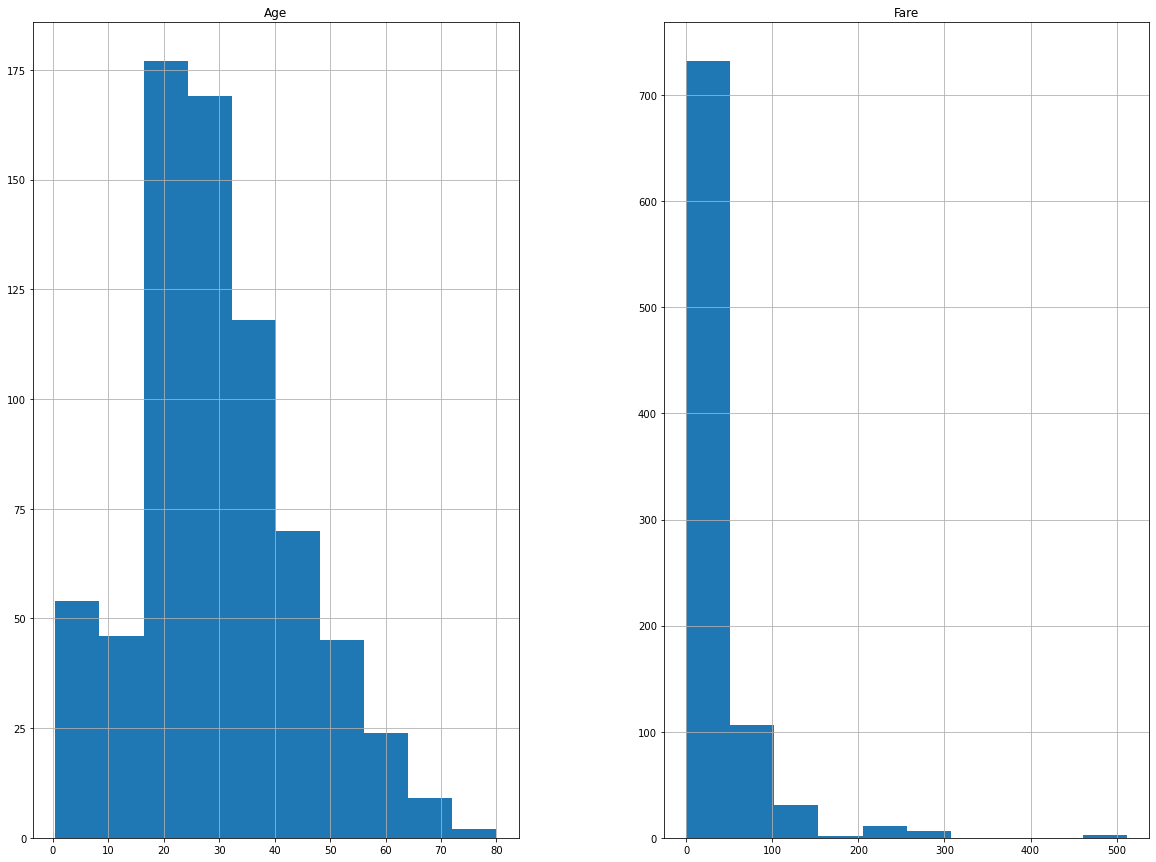

In [11]:
freqraph = dataset.select_dtypes(include=['float'])
freqraph.hist(figsize=(20,15))
plt.show()

##### 1. Handling the missing value of Age:

In [12]:
dataset.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
print('Number of null values in age column: ', dataset['Age'].isnull().sum())

Number of null values in age column:  177


In [14]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
dataset.isna().sum()
print('Number of null values in age column: ', dataset['Age'].isnull().sum())

Number of null values in age column:  0


#### Handling missing values of Cabin and Embarked in the dataset.

#### Cabin column has 687 missing values out of 8891 rows.So we can also drop cabin column

In [15]:
dataset.drop(['Cabin'],axis = 1,inplace=True)

##### Filling the missing values in Embarked column:

In [16]:
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
dataset['Embarked'].isnull().sum()

0

In [17]:
dataset.Embarked.mode()

0    S
dtype: object

In [18]:
dataset.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

#### Filled the null values by:

In [19]:
obj_cols = list(dataset.select_dtypes('object').columns)
for o in obj_cols:
    dataset[o].fillna("NULL",inplace = True)
    

In [20]:
dataset.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

#### Insights:
      There are no more null values present in the dataset after filling the missing values.

### 5. Check and handle outliers in at least 3 columns in the dataset

###### Inorder to check whether there are outliers present in the dataset, we need to plot boxplot of different variables pesent in the dataset.
######  Let's do boxplot of Survived, PClass, Age in the dataset .


Text(0.5, 1.0, 'Boxplot of Survive- ones in the Titanic')

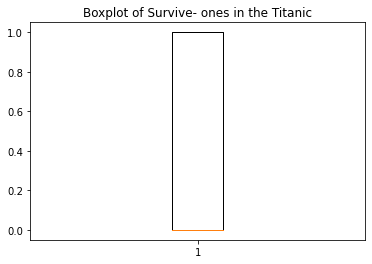

In [21]:
plt.boxplot(dataset['Survived'])
plt.title('Boxplot of Survive- ones in the Titanic')

Text(0.5, 1.0, 'Boxplot of Pclass')

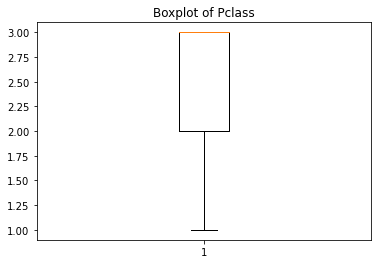

In [22]:
plt.boxplot(dataset['Pclass'])
plt.title('Boxplot of Pclass')

Text(0.5, 1.0, 'Boxplot of Age')

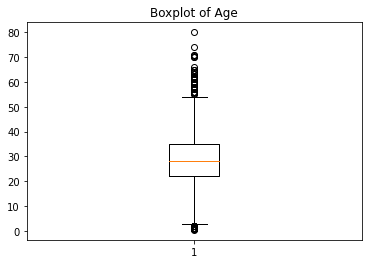

In [23]:
plt.boxplot(dataset['Age'])
plt.title('Boxplot of Age')

### Checking Age Outliers:

In [24]:
Q1=np.percentile(dataset['Age'], 25, interpolation = 'midpoint')
Q2=np.percentile(dataset['Age'], 50, interpolation = 'midpoint')
Q3=np.percentile(dataset['Age'], 75, interpolation = 'midpoint')

In [25]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [26]:
dataset['Age'].median()

28.0

In [27]:
IQR= Q3 - Q1
low_lim = Q1 - 1.5* IQR
up_lim = Q3 + 1.5 * IQR

In [28]:
print("IQR is : ",IQR)
print("Lower Limit is :",low_lim)
print("Upper limit is: ",up_lim)

IQR is :  13.0
Lower Limit is : 2.5
Upper limit is:  54.5


In [29]:
Q1 = dataset['Age'].quantile(0.25)
Q3 = dataset['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Age_outliers = dataset[(dataset['Age'] < Q1 - whisker_width*IQR) | (dataset['Age'] > Q3 + whisker_width*IQR)]
Age_outliers.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.550,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,S
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,Q
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.500,S


In [30]:
outlier = []
for x in dataset['Age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [31]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

###### Checking the values in Age dataset:

In [32]:
inde1 = dataset['Age'] < low_lim
dataset.loc[inde1].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [33]:
inde2 = dataset['Age'] > up_lim
dataset.loc[inde2].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [34]:
dataset['Age']=np.where(dataset['Age']>up_lim,up_lim,np.where(dataset['Age']<low_lim,low_lim,dataset['Age']))
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [35]:
#plt.boxplot(dataset['Age'])
#plt.title("Boxplot of Age")


## For Age we can't remove outliers completly, not plotting its boxplot. 

##### 2. Checkng the Fare outliers:

Text(0.5, 1.0, 'Boxplot of Fare')

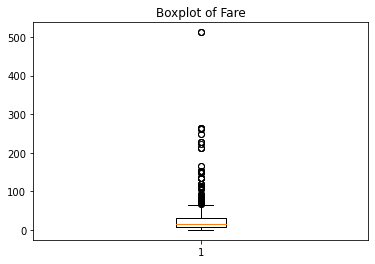

In [36]:
plt.boxplot(dataset["Fare"])
plt.title("Boxplot of Fare")

In [37]:
Q1 = np.percentile(dataset['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(dataset['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(dataset['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [38]:
IQR= Q3 - Q1
low_lim = Q1 - 1.5* IQR
up_lim = Q3 + 1.5 * IQR

In [39]:
print("IQR is : ",IQR)
print("Lower Limit is :",low_lim)
print("Upper limit is: ",up_lim)

IQR is :  23.0896
Lower Limit is : -26.724
Upper limit is:  65.6344


In [40]:
outlier=[]

for x in dataset['Fare']:
    if (x>up_lim) or (x<low_lim):
        outlier.append(x)
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [41]:
#fare_outliers = dataset[(dataset['Fare'] < Q1 - 1.5*IQR) | (dataset['Fare'] > Q3 + 1.5*IQR)]
#fare_outliers.head()

In [42]:
dataset['Fare']=np.where(dataset['Fare']>up_lim,up_lim,np.where(dataset['Fare']<low_lim,low_lim,dataset['Fare']))
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


Text(0.5, 1.0, ' Box plot of Fare')

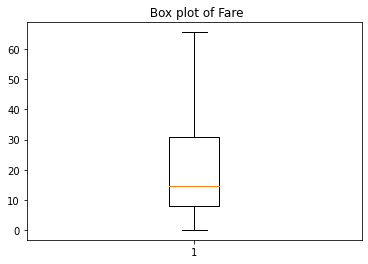

In [43]:
plt.boxplot(dataset['Fare'])
plt.title(' Box plot of Fare')

##### 3. Handling outliers of Sibsp:


Text(0.5, 1.0, ' Box plot of SibSp')

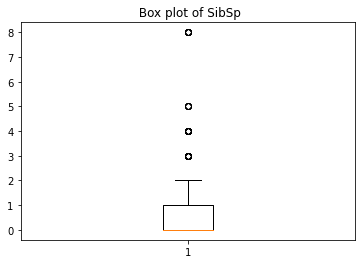

In [44]:
plt.boxplot(dataset['SibSp'])
plt.title(' Box plot of SibSp')

In [45]:
Q1 = np.percentile(dataset['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(dataset['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(dataset['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [46]:
dataset.SibSp.median()

0.0

In [47]:
IQR= Q3 - Q1
low_lim = Q1 - 1.5* IQR
up_lim = Q3 + 1.5 * IQR

In [48]:
print("IQR is : ",IQR)
print("Lower Limit is :",low_lim)
print("Upper limit is: ",up_lim)

IQR is :  1.0
Lower Limit is : -1.5
Upper limit is:  2.5


In [49]:
Q1 = dataset['SibSp'].quantile(0.25)
Q3 = dataset['SibSp'].quantile(0.75)
IQR = Q3 - Q1

Age_outliers = dataset[(dataset['SibSp'] < Q1 - 1.5*IQR) | (dataset['SibSp'] > Q3 + 1.5*IQR)]
Age_outliers.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.5,3,1,349909,21.0750,S
17,0,3,"Rice, Master. Eugene",male,2.5,4,1,382652,29.1250,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,65.6344,S
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,S


In [50]:
outlier=[]
for x in dataset['SibSp']:
    if (x>up_lim) or (x<low_lim):
        outlier.append(x)
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [51]:
dataset['SibSp']=np.where(dataset['SibSp']>up_lim,up_lim,np.where(dataset['SibSp']<low_lim,low_lim,dataset['SibSp']))
#dataset

Text(0.5, 1.0, ' Box plot of SibSp')

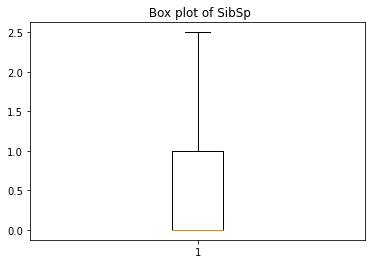

In [52]:
plt.boxplot(dataset['SibSp'])
plt.title(' Box plot of SibSp')

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [53]:
dataset.drop(['Name'],axis = 1,inplace=True)
dataset.drop(['Ticket'],axis = 1,inplace=True)

In [54]:
dataset = pd.get_dummies(dataset)
dataset

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1.0,0,7.2500,0,1,0,0,1
2,1,1,38.0,1.0,0,65.6344,1,0,1,0,0
3,1,3,26.0,0.0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1.0,0,53.1000,1,0,0,0,1
5,0,3,35.0,0.0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0.0,0,13.0000,0,1,0,0,1
888,1,1,19.0,0.0,0,30.0000,1,0,0,0,1
889,0,3,28.0,1.0,2,23.4500,1,0,0,0,1


In [55]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [56]:
y = dataset['Survived']
x = dataset.drop('Survived', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
pred=model.predict(x_test)

In [57]:
print('Mean Squared Error is : ', mean_squared_error(y_test, pred))
print('R Square value obtained is :  ', r2_score(y_test, pred))

Mean Squared Error is :  0.1355816408986861
R Square value obtained is :   0.4409045873829084


In [58]:
y = dataset['Survived']
x = dataset.drop('Survived', axis=1)
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.039282,0.426487,0.381594,24.046813,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.836071,12.072074,0.708246,0.806057,20.481625,0.477990,0.477990,0.391372,0.281141,0.446751
min,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,54.500000,2.500000,6.000000,65.634400,1.000000,1.000000,1.000000,1.000000,1.000000


##### After minmax scaling

In [59]:
min_max = preprocessing.MinMaxScaler(feature_range=(0, 1))
x = min_max.fit_transform(x)

In [60]:
x = pd.DataFrame(x)


In [61]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.039282,0.426487,0.381594,24.046813,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,0.836071,12.072074,0.708246,0.806057,20.481625,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,54.500000,2.500000,6.000000,65.634400,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [63]:
model = lr.fit(x_train, y_train)
predictions_2 = model.predict(x_test)

In [64]:
mse_value = metrics.mean_squared_error(y_test, pred)
print('The mean squared error value is: ', mse_value)
r_square_value = metrics.r2_score(y_test, pred)
print('The r square value is: ', r_square_value)

The mean squared error value is:  0.1355816408986861
The r square value is:  0.4409045873829084


#### Insights:
        After Minmax scaling, we have obtained  Mean squared Error and R- value almost same when compared to the one done before scaling. So the minmax scaling doesnot have any impact on this model and the given model seems to be accurate with a low Mean square Error value.